In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv("Bank_Churn.csv")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


#### Check duplications

In [5]:
df.duplicated().sum()

np.int64(0)

#### Check column values

In [6]:
for col in df.drop(["CustomerId","Surname"],axis=1).columns:
    print(col)
    print(df[col].unique())

CreditScore
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 56

#### Features Analysis

#### Correlation Analysis

In [7]:
num=df.drop("CustomerId",axis=1).select_dtypes("number").columns
num

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

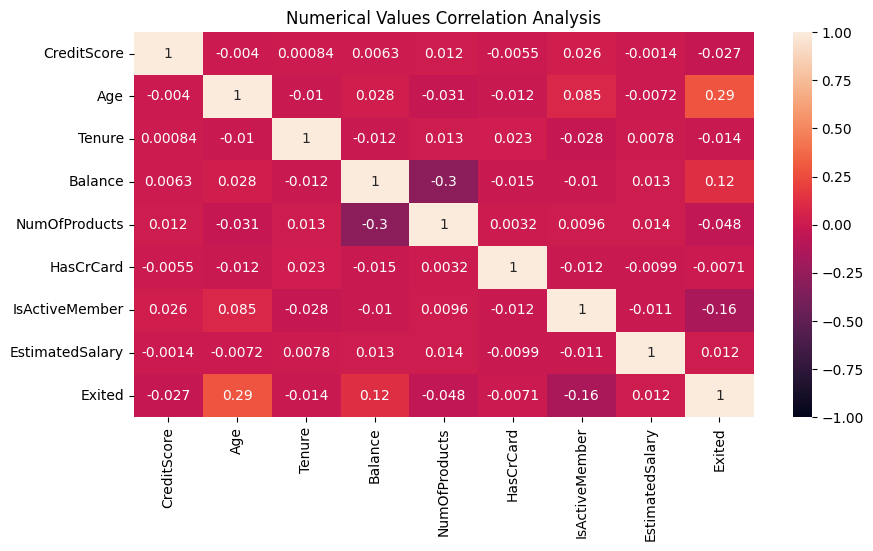

In [8]:
num=df.drop("CustomerId",axis=1).select_dtypes("number").columns
cor=df[num].corr()
plt.figure(figsize=(10,5))
sns.heatmap(cor,vmin=-1,vmax=1,fmt=".2g",annot=True)
plt.title("Numerical Values Correlation Analysis")
plt.show()

#### Most of features have low correlation with target variables except age and IsActiveMember.

#### Convert categorical numeric features to categorical features

In [9]:
df[["Tenure","NumOfProducts","HasCrCard","IsActiveMember","Exited"]]=df[["Tenure","NumOfProducts","HasCrCard","IsActiveMember","Exited"]].astype("object")

In [10]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure              object
Balance            float64
NumOfProducts       object
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited              object
dtype: object

#### Regroup Age feature

In [11]:
def age_group(x):
    if x<40:
        return "Less_than_40"
    elif x<70:
        return "40-70"
    else:
        return "over_70"
df=df.assign(
    agex=df.Age.apply(age_group)
)

#### Seperate object and numeric columns

In [12]:
data=df.drop(["CustomerId","Surname"],axis=1)
obj_cols=data.select_dtypes("object").columns
num_cols=data.select_dtypes("number").columns

In [13]:
for col in obj_cols:
    print(df[col].value_counts())
    #print(df[col].value_counts(normalize=True))

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64
HasCrCard
1    7055
0    2945
Name: count, dtype: int64
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
Exited
0    7963
1    2037
Name: count, dtype: int64
agex
Less_than_40    5987
40-70           3862
over_70          151
Name: count, dtype: int64


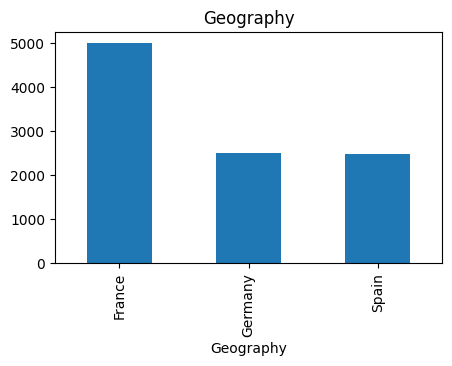

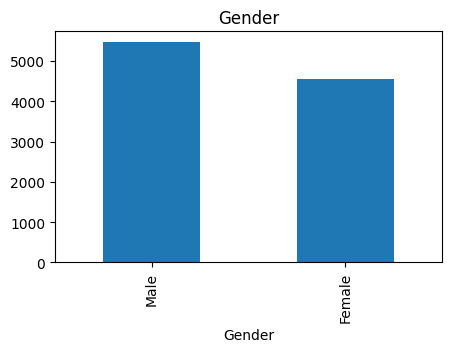

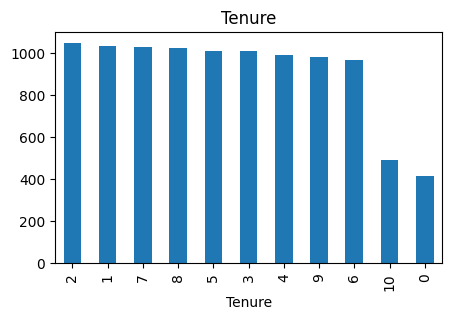

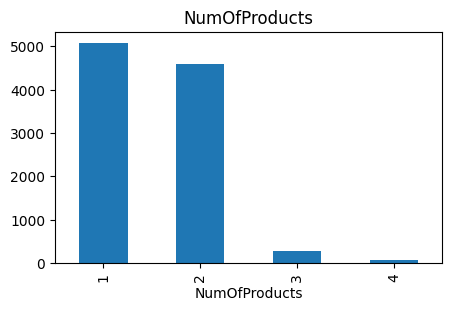

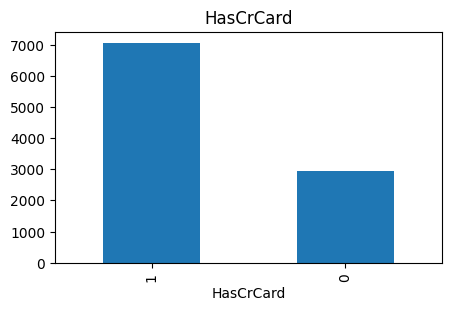

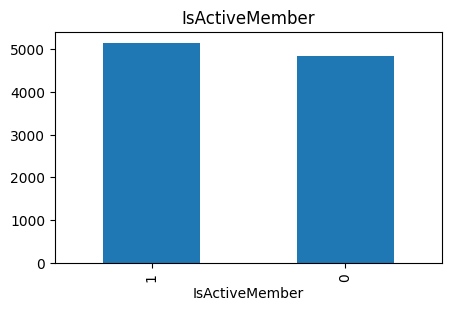

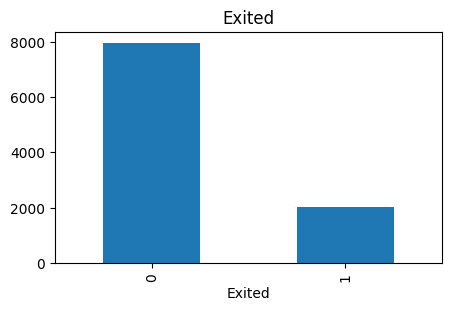

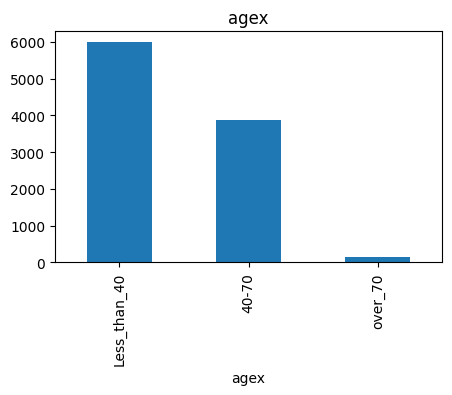

In [14]:
for col in obj_cols:
    plt.figure(figsize=(5,3))
    data[col].value_counts().plot.bar()
    plt.title(f"{col}")
    plt.show()

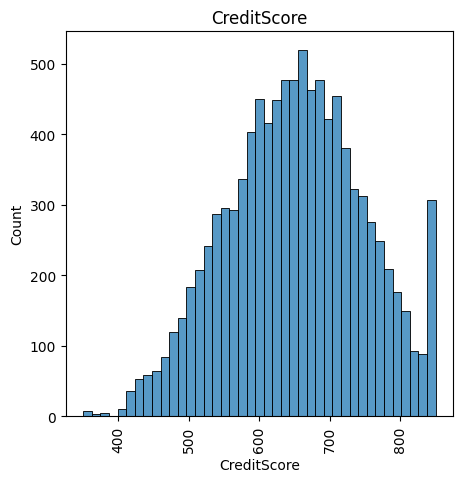

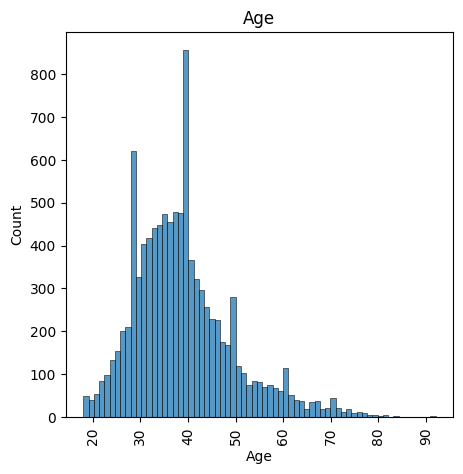

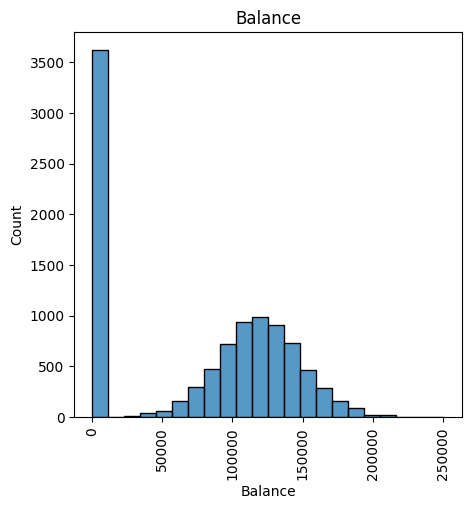

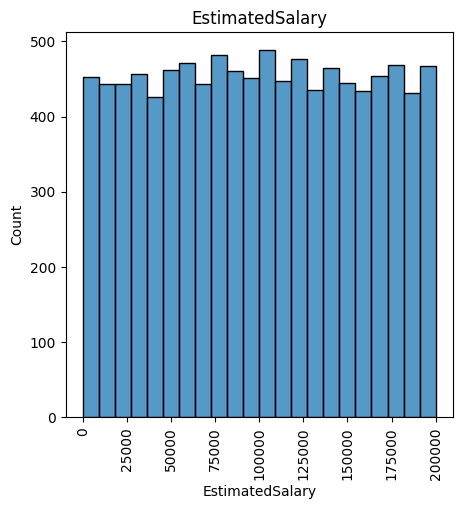

In [15]:
for col in num_cols:
    plt.figure(figsize=(5,5))
    sns.histplot(data=data,x=col)
    plt.title(f"{col}")
    plt.xticks(rotation=90)
    plt.show()

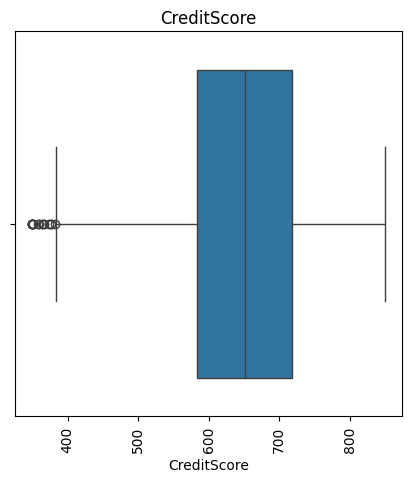

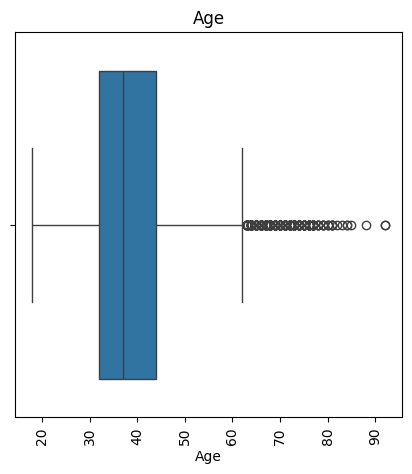

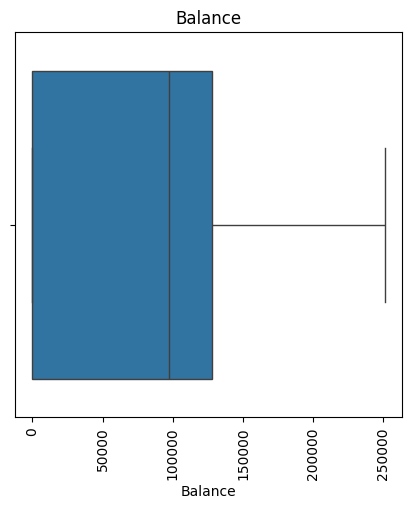

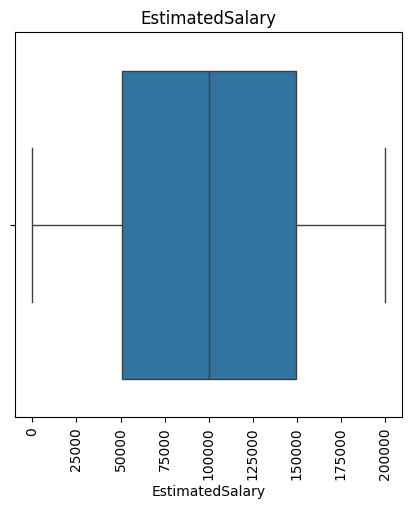

In [16]:
for col in num_cols:
    plt.figure(figsize=(5,5))
    sns.boxplot(data=data,x=col)
    plt.title(f"{col}")
    plt.xticks(rotation=90)
    plt.show()

#### Numerical mean for churn groups

The feature is CreditScore.


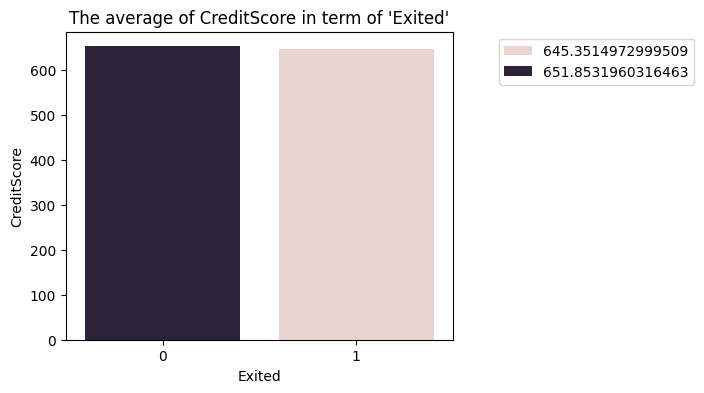

The feature is Age.


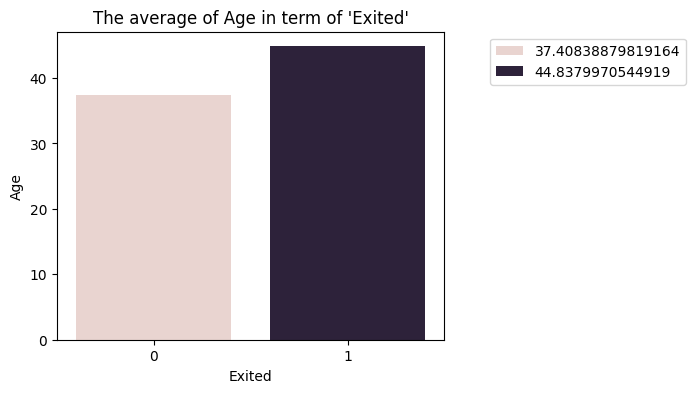

The feature is Balance.


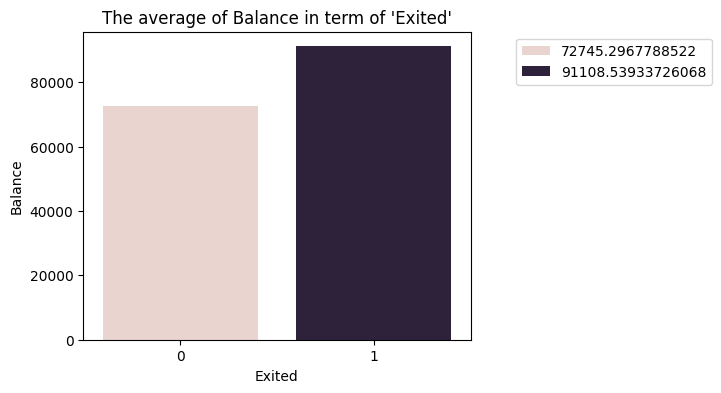

The feature is EstimatedSalary.


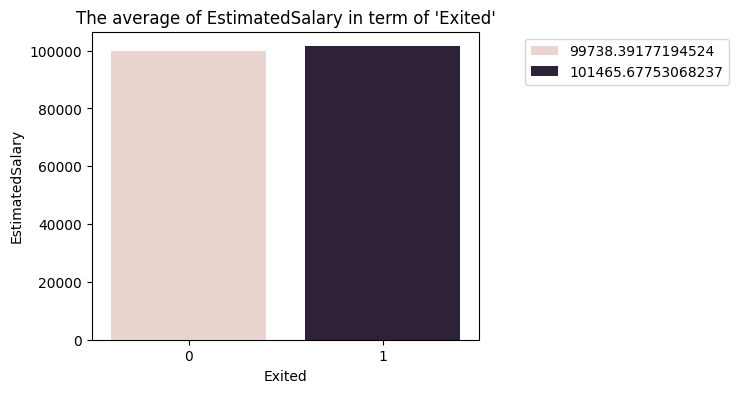

In [17]:
for col in num_cols:
    print(f"The feature is {col}.")
    a=df.groupby("Exited")[col].mean().reset_index()
    plt.figure(figsize=(5,4))
    sns.barplot(data=a,x="Exited",y=f"{col}",hue=f"{col}")
    plt.legend(bbox_to_anchor=(1.1,1))
    plt.title(f"The average of {col} in term of 'Exited'")
    plt.show()

#### The numerical features with different values in term of exited are age and balance

#### plots for numerical values and exited category

<Figure size 500x300 with 0 Axes>

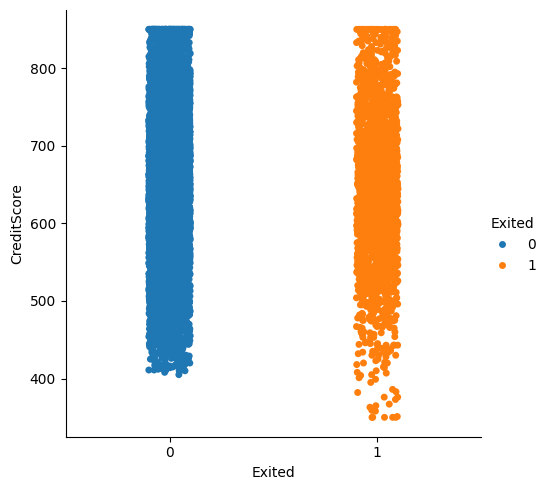

<Figure size 500x300 with 0 Axes>

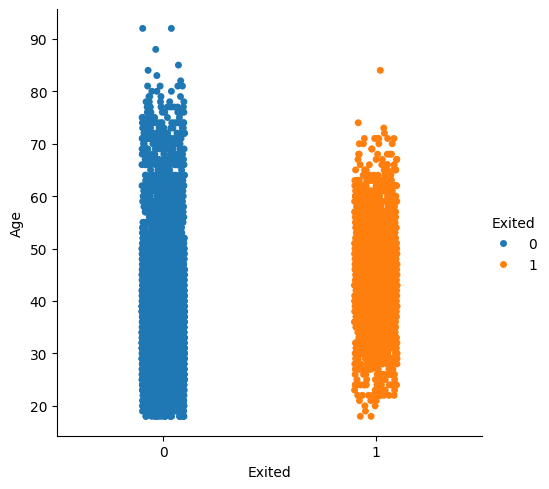

<Figure size 500x300 with 0 Axes>

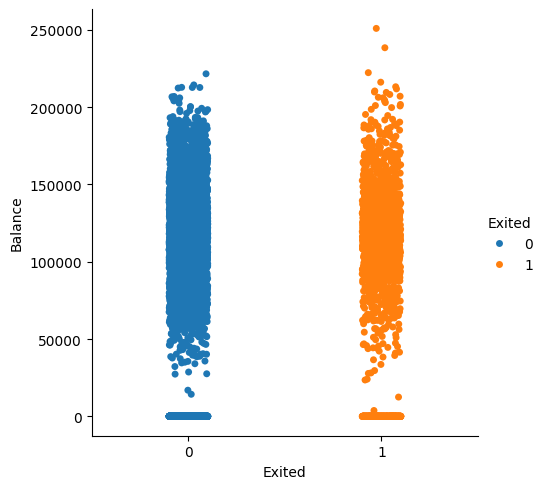

<Figure size 500x300 with 0 Axes>

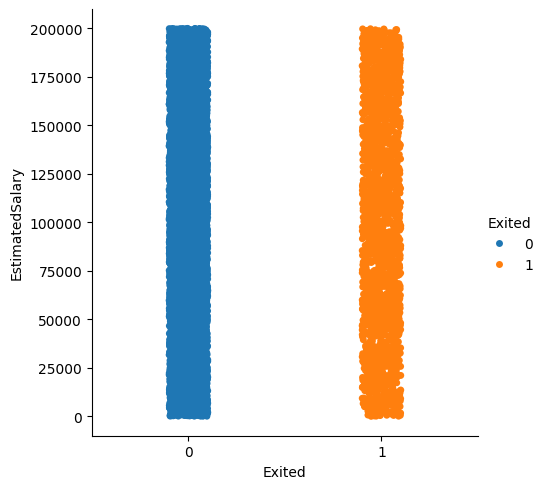

In [18]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.catplot(data=df,x="Exited",y=f"{col}", hue="Exited")
    plt.show()

## Categorical churn rate

In [19]:
for col in obj_cols:
    print(f"It's the columns of {col}.")
    a=df.groupby([col,"Exited"])["CustomerId"].count().unstack()
    a["Churn_rate"]=a[1]/(a[0]+a[1])
    a=a.reset_index()
    print(a)
    print("-------------")

It's the columns of Geography.
Exited Geography     0    1  Churn_rate
0         France  4204  810    0.161548
1        Germany  1695  814    0.324432
2          Spain  2064  413    0.166734
-------------
It's the columns of Gender.
Exited  Gender     0     1  Churn_rate
0       Female  3404  1139    0.250715
1         Male  4559   898    0.164559
-------------
It's the columns of Tenure.
Exited  Tenure    0    1  Churn_rate
0            0  318   95    0.230024
1            1  803  232    0.224155
2            2  847  201    0.191794
3            3  796  213    0.211100
4            4  786  203    0.205258
5            5  803  209    0.206522
6            6  771  196    0.202689
7            7  851  177    0.172179
8            8  828  197    0.192195
9            9  771  213    0.216463
10          10  389  101    0.206122
-------------
It's the columns of NumOfProducts.
Exited  NumOfProducts       0       1  Churn_rate
0                   1  3675.0  1409.0    0.277144
1              

In [50]:
print(df.query("NumOfProducts in [4]")["Balance"].mean())
print(df.query("NumOfProducts in [3]")["EstimatedSalary"].mean())
#df.query("HasCrCard==1")["Geography"].value_counts()

93733.13500000001
104318.13056390977


#### Churn rate in each country with different categorical features. 

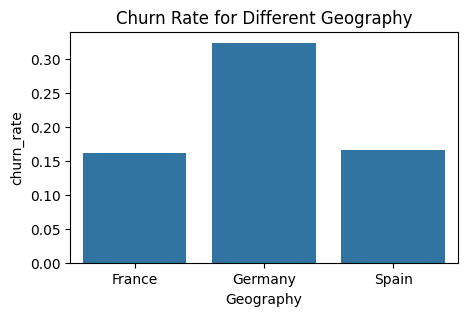

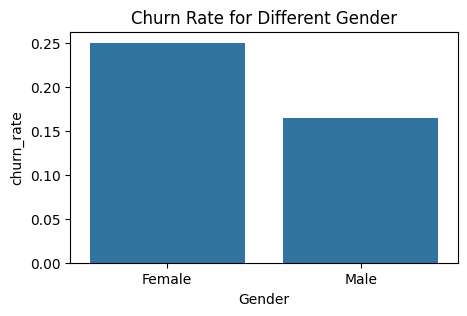

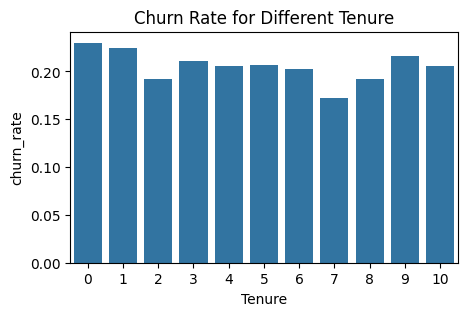

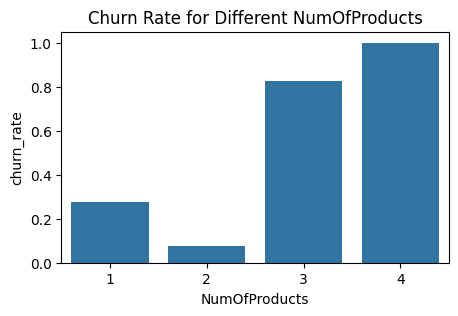

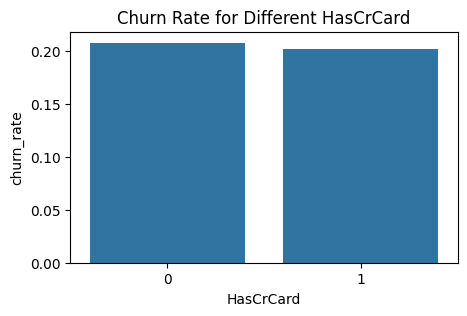

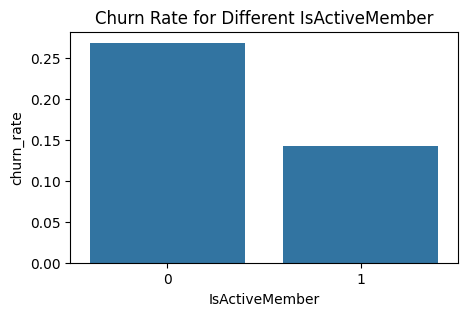

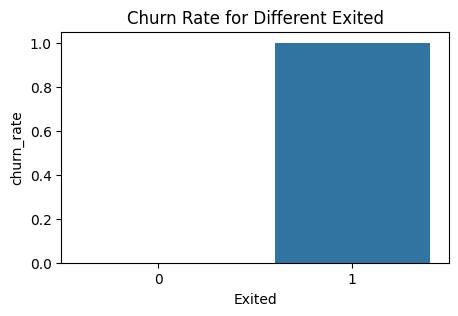

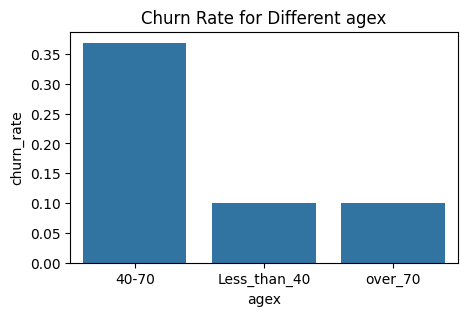

In [21]:
for col in obj_cols:
    a=df.groupby([col,"Exited"]).CustomerId.count().unstack()
    a["total"]=a.sum(axis=1)
    a["churn_rate"]=a[1]/a.total
    a=a.reset_index()
    plt.figure(figsize=(5,3))
    sns.barplot(data=a,x=f"{col}",y="churn_rate")
    plt.title(f"Churn Rate for Different {col}")
    plt.show()
    
    #print(a["churn_rate"])
   # print(a)

#### The categorical features relate the most to the churns are Georgraphy, Gender,NumOfProducts, IsActuveMember, Age.



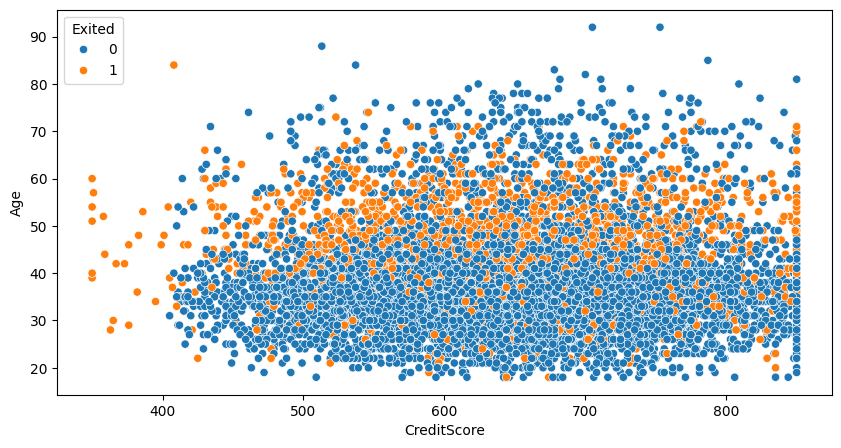

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x="CreditScore",y="Age",hue="Exited")
plt.show()

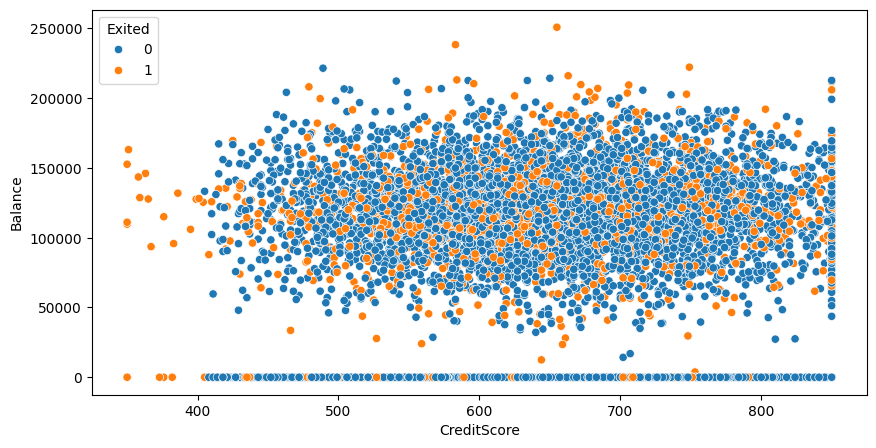

In [23]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x="CreditScore",y="Balance",hue="Exited")
plt.show()

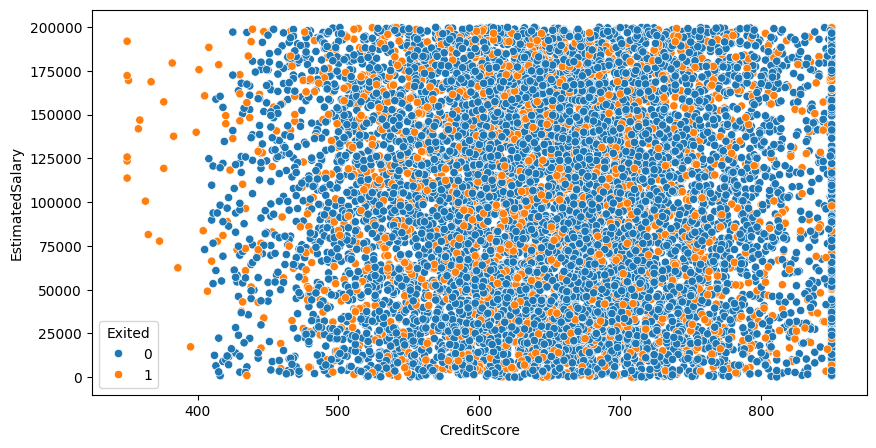

In [24]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x="CreditScore",y="EstimatedSalary",hue="Exited")
plt.show()

In [25]:
num_cols

Index(['CreditScore', 'Age', 'Balance', 'EstimatedSalary'], dtype='object')

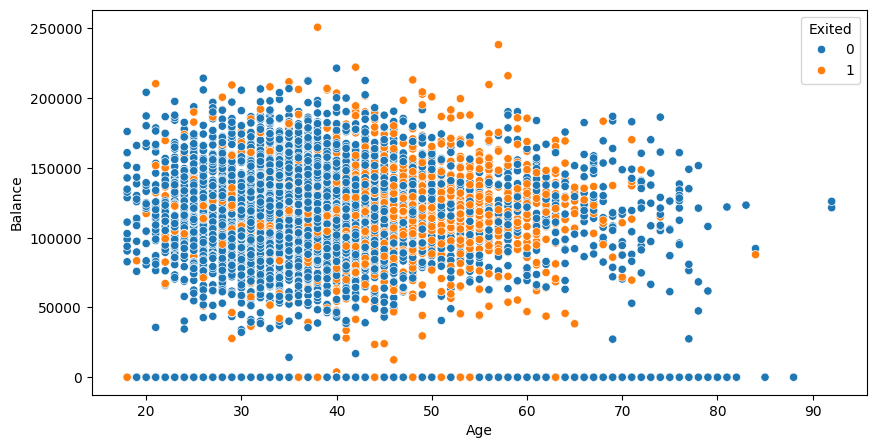

In [26]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x="Age",y="Balance",hue="Exited")
plt.show()

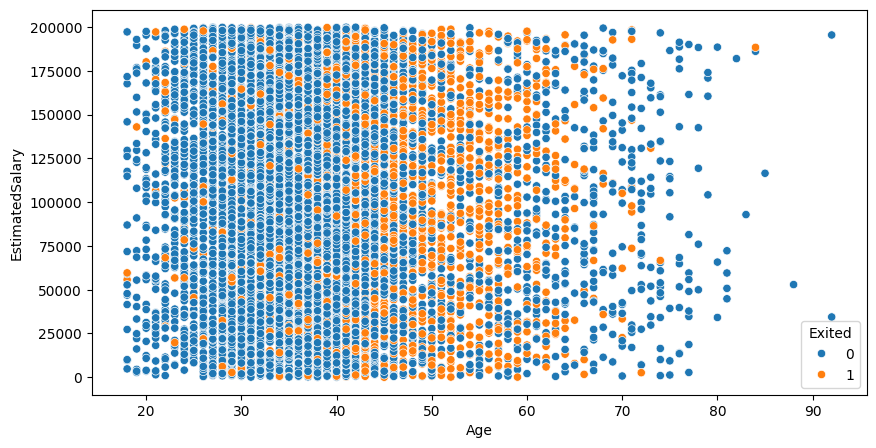

In [27]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x="Age",y="EstimatedSalary",hue="Exited")
plt.show()

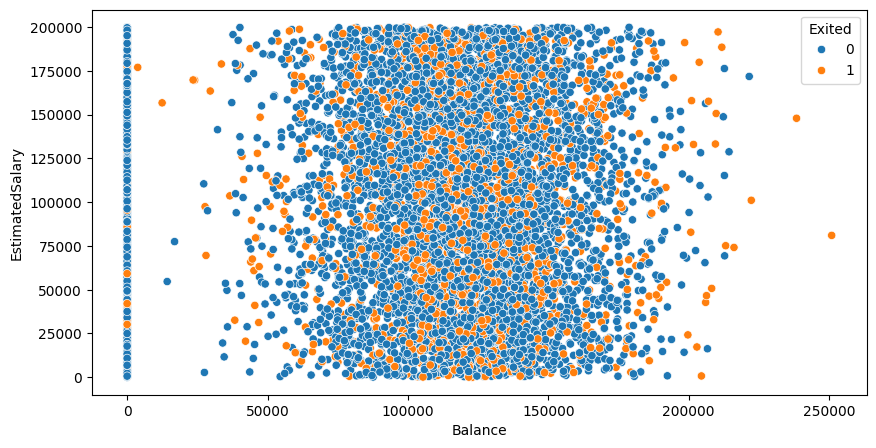

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x="Balance",y="EstimatedSalary",hue="Exited")
plt.show()

#### Drill Down of the features

## Geography vs gender

In [29]:
for country in df.Geography.unique().tolist():
    print(f"The georaphy is {country}.")
    a=df.query("Geography==@country").groupby(["Gender","Exited"]).CustomerId.count().unstack()
    a["churned"]=a[1]/(a[0]+a[1])
    print(a)

The georaphy is France.
Exited     0    1   churned
Gender                     
Female  1801  460  0.203450
Male    2403  350  0.127134
The georaphy is Spain.
Exited     0    1   churned
Gender                     
Female   858  231  0.212121
Male    1206  182  0.131124
The georaphy is Germany.
Exited    0    1   churned
Gender                    
Female  745  448  0.375524
Male    950  366  0.278116


In [30]:
## Both male and female had a higher churn rate in Germany than any other nations. 
# Male had a lower churn rate than female counterpart.

## Georagphy vs number of product

In [31]:
for country in df.Geography.unique().tolist():
    print(f"The georaphy is {country}.")
    a=df.query("Geography==@country").groupby(["NumOfProducts","Exited"]).CustomerId.count().unstack()
    a["churned"]=a[1]/(a[0]+a[1])
    print(a)

The georaphy is France.
Exited              0      1   churned
NumOfProducts                         
1              1950.0  564.0  0.224344
2              2232.0  135.0  0.057034
3                22.0   82.0  0.788462
4                 NaN   29.0       NaN
The georaphy is Spain.
Exited              0      1   churned
NumOfProducts                         
1               954.0  267.0  0.218673
2              1096.0   87.0  0.073542
3                14.0   52.0  0.787879
4                 NaN    7.0       NaN
The georaphy is Germany.
Exited             0      1   churned
NumOfProducts                        
1              771.0  578.0  0.428466
2              914.0  126.0  0.121154
3               10.0   86.0  0.895833
4                NaN   24.0       NaN


In [32]:
#### In each nation, Clients with four products have churned 100%, 
#### and clients with 3 products churned the least. 
#### Clients with 3 and 4 products churned the most. 
#### Once again, Germany had the highest churn rate in each category.

In [33]:
for country in df.Geography.unique().tolist():
    print(f"The georaphy is {country}.")
    a=df.query("Geography==@country").groupby(["IsActiveMember","Exited"]).CustomerId.count().unstack()
    a["churned"]=a[1]/(a[0]+a[1])
    print(a)

The georaphy is France.
Exited             0    1   churned
IsActiveMember                     
0               1911  512  0.211308
1               2293  298  0.115014
The georaphy is Spain.
Exited             0    1   churned
IsActiveMember                     
0                893  272  0.233476
1               1171  141  0.107470
The georaphy is Germany.
Exited            0    1   churned
IsActiveMember                    
0               743  518  0.410785
1               952  296  0.237179


In [34]:
for country in df.Geography.unique().tolist():
    print(f"The georaphy is {country}.")
    a=df.query("Geography==@country").groupby(["agex","Exited"]).CustomerId.count().unstack()
    a["churned"]=a[1]/(a[0]+a[1])
    print(a)

The georaphy is France.
Exited           0    1   churned
agex                             
40-70         1244  576  0.316484
Less_than_40  2888  228  0.073171
over_70         72    6  0.076923
The georaphy is Spain.
Exited           0    1   churned
agex                             
40-70          665  276  0.293305
Less_than_40  1368  134  0.089214
over_70         31    3  0.088235
The georaphy is Germany.
Exited           0    1   churned
agex                             
40-70          528  573  0.520436
Less_than_40  1134  235  0.171658
over_70         33    6  0.153846


In [35]:
for country in df.Geography.unique().tolist():
    print(f"The georaphy is {country}.")
    a=df.query("Geography==@country").groupby(["HasCrCard","Exited"]).CustomerId.count().unstack()
    a["churned"]=a[1]/(a[0]+a[1])
    print(a)

The georaphy is France.
Exited        0    1   churned
HasCrCard                     
0          1230  241  0.163834
1          2974  569  0.160598
The georaphy is Spain.
Exited        0    1   churned
HasCrCard                     
0           621  135  0.178571
1          1443  278  0.161534
The georaphy is Germany.
Exited        0    1   churned
HasCrCard                     
0           481  237  0.330084
1          1214  577  0.322166


#### Analysis for numerical values and target variables.

#### CreditScore and Tenure has no effects on each country's churn rate.

In [36]:
for country in df.Geography.unique().tolist():
    print(f"The georaphy is {country}.")
    a=df.query("Geography==@country").groupby(["Exited"]).CreditScore.mean()
    print(a)

The georaphy is France.
Exited
0    651.162226
1    641.914815
Name: CreditScore, dtype: float64
The georaphy is Spain.
Exited
0    652.104167
1    647.484262
Name: CreditScore, dtype: float64
The georaphy is Germany.
Exited
0    653.261357
1    647.689189
Name: CreditScore, dtype: float64


In [37]:
for country in df.Geography.unique().tolist():
    print(f"The georaphy is {country}.")
    a=df.query("Geography==@country").groupby("Exited").Tenure.mean()
    print(a)

The georaphy is France.
Exited
0    5.005471
1         5.0
Name: Tenure, dtype: object
The georaphy is Spain.
Exited
0    5.107558
1    4.656174
Name: Tenure, dtype: object
The georaphy is Germany.
Exited
0    5.011799
1    5.006143
Name: Tenure, dtype: object


In [38]:
for country in df.Geography.unique().tolist():
    print(f"The georaphy is {country}.")
    a=df.query("Geography==@country").groupby("Exited").Balance.mean()
    print(a)

The georaphy is France.
Exited
0    60339.275678
1    71192.795728
Name: Balance, dtype: float64
The georaphy is Spain.
Exited
0    59678.070470
1    72513.352446
Name: Balance, dtype: float64
The georaphy is Germany.
Exited
0    119427.106696
1    120361.075590
Name: Balance, dtype: float64


In [39]:
#### Once again Germany churn rate had dominated in each and every age group. 

#### In conclusion.
#### The features relate the most to the churns are Georgraphy, Gender, NumOfProducts, IsActuveMember, Age.

#### High Value Customers in terms of Country, Sex, and Age

In [40]:
a=df.groupby("Geography")[["Balance","EstimatedSalary"]].mean()
a.style.background_gradient(axis=0)

,Balance,EstimatedSalary
Geography,,
France,62092.636516,99899.180814
Germany,119730.116134,101113.435102
Spain,61818.147763,99440.572281


In [41]:
a=df.groupby(["Geography","agex"])[["Balance","EstimatedSalary"]].mean()
a.style.background_gradient(axis=0)

#### Save cleaned dataframe to scv

In [42]:
#df.to_csv("Cleaned.csv")